# Classification in Practice

In this laboratory session we will gain some experience working with linear models for **classification** (we already saw how to do regression in a previous lab).

We will follow the same general structure... with one exception -- for this laboratory we will begin with **synthetic** datasets. 

## Part 1: Working with Synthetic Classification Problems

Generating synthetic datasets allows us to gain insight into how classifiers work. We will use some functionality of Scikit-learn to generate -- in a controlled manner -- synthetic classification problems of with various characteristics.

**Note**: When working with these synthetic datasets we will *not* go to the trouble of generating train/test splits -- we are only interested in studying how classifiers work to **separate** the training data.

### Exercise 1.1: Generating a dataset

First, have a look at the documentation for [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). This is one of the easiest ways to generate /simple/ classification problems. Study the documentation and then use `make_blobs` to generate an **EASY** dataset for a **two-class** classification problem with 100 samples per class and 2 input features. What does **EASY** mean? How can we determine, qualitatively, that the randomly generated dataset is "easy"?

**Hint**: You will probably want to develop a *visualization* for datasets, and then *abstract* it into a function you can call later for other datasets. 

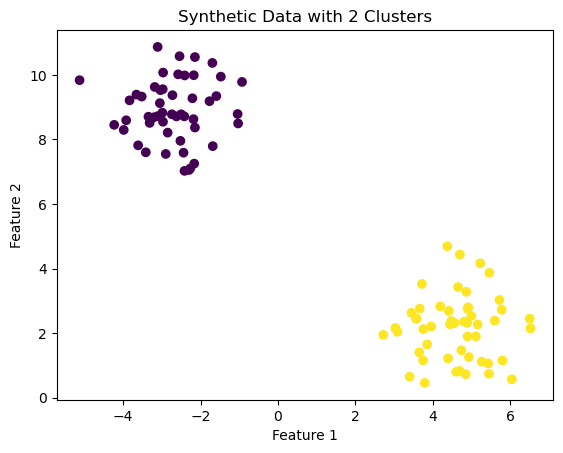

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import warnings

# Filter out the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.covariance._empirical_covariance")
warnings.filterwarnings("ignore", category=UserWarning, message="Variables are collinear", module="sklearn.discriminant_analysis")
warnings.filterwarnings("ignore", category=UserWarning, message="Variables are collinear", module="sklearn.metrics")



def visualizer(Xs, ys):
    # Generate synthetic data with 2 clusters

    # Scatter plot of the synthetic data
    plt.scatter(Xs_easy[:, 0], Xs_easy[:, 1], c=ys_easy, cmap='viridis')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title('Synthetic Data with 2 Clusters')
    plt.show()

# Call the visualization function
Xs_easy, ys_easy = make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)
visualizer(Xs_easy, ys_easy)


the previous code is the beginning of the exercise loading the 'easy' dataset. This means:
1) Low Dimensionality: Easy datasets usually have a low number of features (attributes or variables). This makes it easier to visualize and analyze the data.
2) Low Noise: The data is relatively clean and contains minimal or no outliers, missing values, or errors.
3) Linear Separability: In classification problems, an easy dataset might have classes that are linearly separable, meaning they can be separated by a straight line or hyperplane.
4) Low Complexity Models: Simple and straightforward machine learning models can effectively handle easy datasets. Complex models are often not required.


### Exercise 1.2: "Solving" the dataset

Train a classifier that is *perfectly* classifies the dataset you created above. Any of the the three classifiers mentioned in the *Capsule Lecture* should do well. Try one, or try all three. Be sure to verify that the classifier does *indeed* classify all training points correctly.

**Hint**: You might want to look at [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for this.

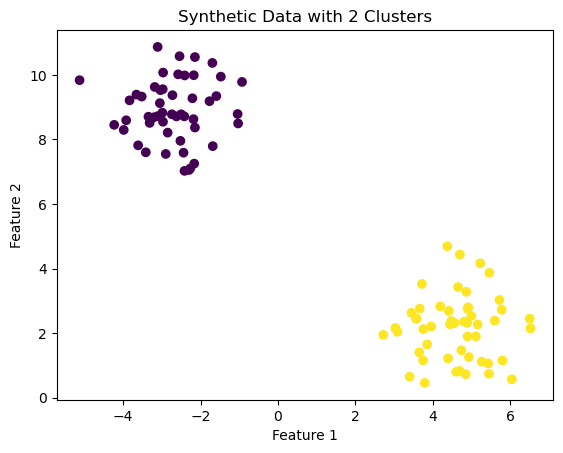

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC #support vector classifier
from  sklearn.metrics import classification_report

def visualizeClassifier(lda, X, y):
    lda.fit(X, y)  # Fit the LinearDiscriminantAnalysis model to the data
    correct = (lda.predict(X) == y)  # Check if predictions match ground truth
    visualizer(Xs_easy, ys_easy)
    accuracy = sum(correct) / len(correct)  # Calculate accuracy
    print(f"Accuracy: {accuracy:.2f}")

    # Print a classification report for precision, recall, and F1-score
    print(classification_report(y, lda.predict(X)))
    
# Create a LinearDiscriminantAnalysis classifier
lda = LinearDiscriminantAnalysis()

# Call the visualization function to analyze and display the classifier
visualizeClassifier(lda, Xs_easy, ys_easy)

 The classification report indicates that the model achieved a perfect classification with an accuracy of 1.00 for both classes. This suggests that the model is capable of distinguishing between the two classes with high precision and recall, resulting in an outstanding F1-score. This is an ideal classification scenario where the model makes no errors.

In [3]:
# Create a Linear Support Vector Classifier (SVC) with 'dual' set to True to address a warning
svc = LinearSVC(dual=True)

# Fit the Linear SVC model to the dataset
svc.fit(Xs_easy, ys_easy)

# Make predictions using the trained model and check for correctness
correct = (svc.predict(Xs_easy) == ys_easy)

# Generate a classification report to assess the model's performance
report = classification_report(ys_easy, svc.predict(Xs_easy))
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Even in this case we have a perfect accuracy score.

### Exercise 1.3: Visualizing the decision surfaces

One of the best ways to understand how a classifier works is to visualize the decision boundaries. Use [sklearn.inspection.DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) to create a visualization of the *dataset* and the *decision boundaries* for your classifier.

**Note**: This is another great opportunity to apply *functional abstraction* and make a **reusable** visualization that you can reuse (for example in the next exercise).

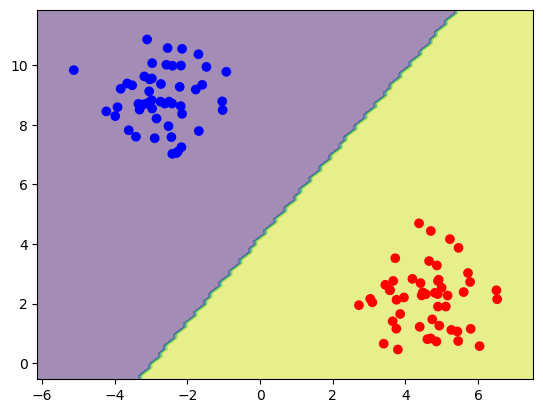

In [4]:
# Import the necessary function for decision boundary visualization
from sklearn.inspection import DecisionBoundaryDisplay

# Define a function to visualize the decision boundary of a classifier
def visualizeDecisionBoundary(classifier, X, y, cmap="bwr", alpha=0.5, response_method="predict"):
    # Fit the classifier on the input data and labels
    classifier.fit(X, y)

    # Create a decision boundary display using the provided classifier, data, response method, and alpha transparency
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier, X, response_method=response_method, alpha=alpha
    )

    # Scatter plot of the input data points with colors based on class labels
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

# Create an instance of Linear Discriminant Analysis (LDA)
ldc = LinearDiscriminantAnalysis()

# Visualize the decision boundary of the LDA classifier on the provided dataset
visualizeDecisionBoundary(ldc, Xs_easy, ys_easy)


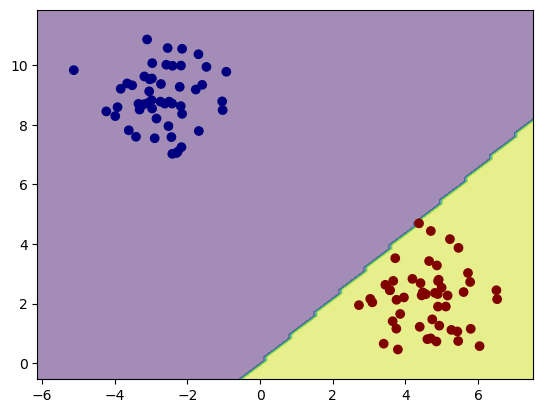

In [5]:
# Create an instance of Linear Discriminant Analysis (LDA) classifier
ldc = LinearDiscriminantAnalysis()

# Fit the LDA classifier on the provided dataset
ldc.fit(Xs_easy, ys_easy)

# Create an instance of Linear Support Vector Classifier (SVC) with specific parameters
svc = LinearSVC(C=0.00000001, dual=True)

# Fit the Linear SVC classifier on the provided dataset
svc.fit(Xs_easy, ys_easy)

# Visualize the decision boundary of the Linear SVC classifier on the dataset
visualizeDecisionBoundary(svc, Xs_easy, ys_easy, cmap="jet")

This code demonstrates the fitting and visualization of decision boundaries for both LDA and Linear SVC classifiers on the same dataset, allowing for a comparison between the two classifiers. The difference in the visualized decision boundaries is a key aspect of the analysis.

### Exercise 1.4: A harder dataset

Repeat the exercises above, but first generate a **hard** dataset that is not linearly separable. Observe how linear classifiers fail to correctly classify the training data. How can we make these classifiers capable of "solving" this harder dataset?

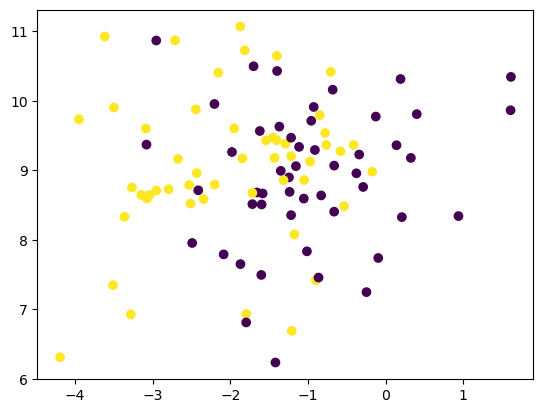

In [6]:
(Xs_easy, ys_easy) = make_blobs(centers=2) # harddataset
plt.scatter(Xs_easy[:,0], Xs_easy[:,1], c=ys_easy)

A "hard dataset" typically refers to a dataset that is challenging for machine learning algorithms to accurately classify or predict. Characteristics of a hard dataset may include:
1) Overlapping Classes: In a classification problem, the data points from different classes overlap significantly, making it difficult for a model to draw clear boundaries between the classes.
2) onlinear Relationships: In regression problems, the relationships between input features and the target variable may be highly nonlinear, making it difficult for linear models to capture these relationships.
3) Outliers: Outliers, or extreme values, can skew the learning process and negatively impact the model's performance.

/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


QDA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

SVM:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        50
           1       0.73      0.80      0.76        50

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



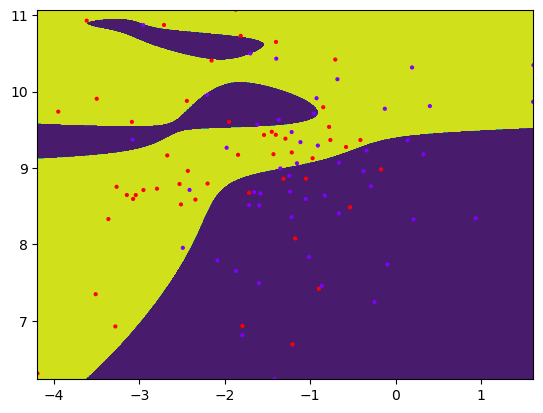

In [7]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Create polynomial features up to the 10th degree for the input data
mapper = PolynomialFeatures(degree=10)
Xs_mapped = mapper.fit_transform(Xs_easy)

# Create an instance of the Quadratic Discriminant Analysis (QDA) classifier
qdc = QuadraticDiscriminantAnalysis()

# Fit the QDA classifier to the mapped data
qdc.fit(Xs_mapped, ys_easy)

# Create an instance of Linear Support Vector Classifier (SVC) with specific parameters
svc = SVC(C=1000000, tol=1e-9, max_iter=1000000)

# Fit the Linear SVC classifier to the mapped data
svc.fit(Xs_mapped, ys_easy)

# Print classification reports for both QDA and Linear SVC classifiers
print('QDA:')
print(classification_report(ys_easy, qdc.predict(Xs_mapped)))

print('SVM:')
print(classification_report(ys_easy, svc.predict(Xs_mapped)))

# Define a function for visualization
def coolVisualizer(Xs_easy, ys_easy):
    # Create a grid of points for visualization
    (xs, ys) = np.meshgrid(np.linspace(Xs_easy[:,0].min(), Xs_easy[:,0].max(), 1000),np.linspace(Xs_easy[:,1].min(), Xs_easy[:,1].max(), 1000))
    
    # Transform the grid points using the polynomial mapper
    trans_grid = mapper.fit_transform(np.vstack([xs.flatten(), ys.flatten()]).T)
    
    # Make predictions using the Linear SVC classifier on the transformed grid
    trans_preds = svc.predict(trans_grid).reshape(xs.shape)

    # Create a DecisionBoundaryDisplay object for visualization
    foo = DecisionBoundaryDisplay(response=trans_preds, xx0=xs, xx1=ys)
    foo.plot()
    
    # Scatter plot of the original data points with colors based on class labels
    plt.scatter(Xs_easy[:,0], Xs_easy[:,1], c=ys_easy, cmap='rainbow', s=4)

# Call the visualization function to plot the decision boundary
coolVisualizer(Xs_easy, ys_easy)



The code demonstrates how to visualize the decision boundary of a classifier after transforming the input data with polynomial features. It enables visual comparison of the decision boundaries created by the QDA and Linear SVC classifiers.
The calssification score has a perfet score basically every time we run the program. Otherwise the svc not always has a perfet score. All depends on the dataset created.

---
## Part 2: A Real Dataset

In the second set of exercises we will work with a classic dataset for classification: the Iris Flower Classification Dataset. It is a fairly easy dataset to work with since it is low-dimensional and small. We start by loading the dataset, and then proceed with our usual protocol: "playing" with the data, creating train/test splits, and building and evaluating a first classifier. 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

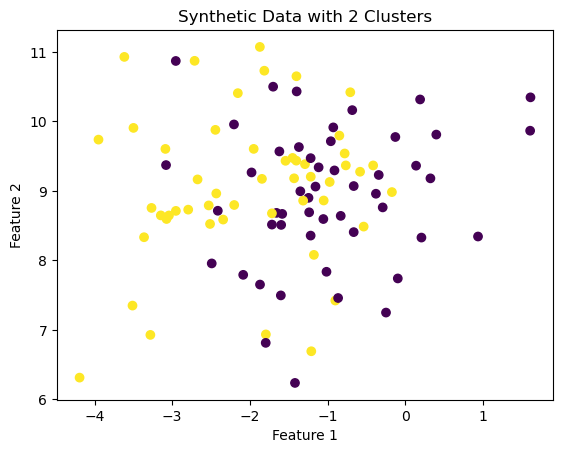

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris classification dataset to get started.
ds = load_iris()

# Extract the features (Xs), targets (ys), and class names (labels).
Xs = ds.data
ys = ds.target
classes = ds.target_names

# Make a Pandas DataFrame too, just for shits and giggles.
df = pd.DataFrame(Xs, columns=ds.feature_names)
targets = pd.Series(ds.target)

# Print the class labels (targets) to check the dataset's structure.
print(ds['DESCR'])

column_names = ds['feature_names']
print(column_names)
# Split the dataset into training and testing sets using train_test_split, where Xtr and ytr are training data.
Xtr, Xts, ytr, yts = train_test_split(Xs, ys, random_state=42)

visualizer(Xtr, ytr)



Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988


### Exercise 2.1: Play with the data

Use everything we have learned about *exploratory data analysis* to study the nature and characteristics of this classification problem. Are the classes equally represented? How many features are there in input? **Be creative** and **summarize** your findings with analysis along the way.

0    50
1    50
2    50
Name: count, dtype: int64
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


<Axes: >

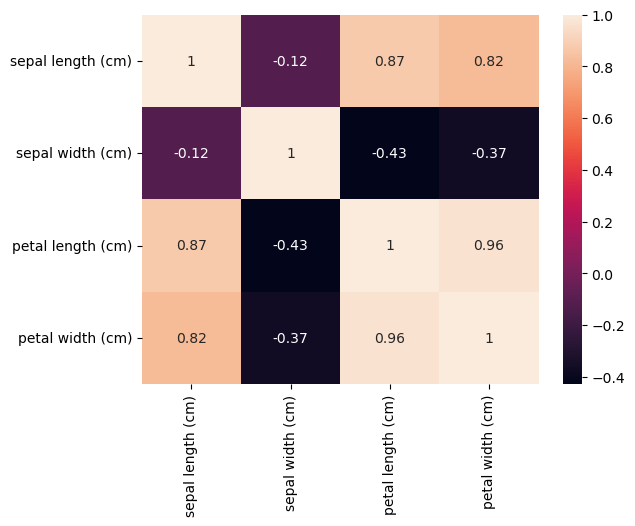

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import DataConversionWarning


# Count the distribution of classes in the dataset
class_distribution = targets.value_counts()
print(class_distribution)

# Print the names of the columns (features)
print(df.columns)

# Calculate the correlation matrix between features
corr_matrix = df.corr()

# Create a heatmap to visualize the correlations, with annotations
sns.heatmap(corr_matrix, annot=True)




The input dataset contains 4 features. These features represent different measurements of sepal length, sepal width, petal length, and petal width for the iris flowers in the dataset.

The dataset contains three classes (species): "setosa," "versicolor," and "virginica."
Each class has 50 instances, indicating a balanced distribution. This balance is important as it ensures that the model doesn't have a class imbalance problem, which can affect classification accuracy.

The heatmap visually represents the correlation between features. In the Iris dataset, there is a high positive correlation between petal length and petal width, as well as a moderate negative correlation between sepal width and petal length.

### Exercise 2.2: Your Turn

Design an experiment to decide which of the three classifiers we have seen performs best on this dataset. Some things to keep in mind:
+ You will probably want to use [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to perform K-fold cross-validation to ensure you are *robustly* estimating performance.
+ All three of the classifier models we have used support **regularization**, which might be an interesting hyperparameter to cross-validate. Unfortunately they use slightly different terminologies:
  + in `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` it is called `shrinkage`
  + in `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis` it is called `reg_param`
  + and in `sklearn.svm.LinearSVC` it is called `C` -- but the regularization performed is 1/C!
  
**Important**: Remember to *document* your findings and analyses along the way. Summarize and justify your final conclusions.

**READ ME**

Here begins the fun part. Before we start, I need to clarify a few things:
Caught up in excitement, I began writing the code without reviewing the material. As a result, I manually did what was already there. I decided to leave this part as it is because we need to carry out some experiments, and why not see what happens even with "incorrect" methods?
This exercise 2 was completed as mentioned above. However, the correct part was applied in exercise 3, as for computational reasons, the calculation seemed too complex.

In [10]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

# Function to find the best configuration for Linear Discriminant Analysis (LDA)
def bestLDA(Xs, ys):
    # List of shrinkage values to evaluate
    shrinkage = [None, 'auto', 0.0000001, 0.2, 0.3, 0.4, 0.9]

    # Dictionary to store cross-validation results
    cross_val_results_LDA = {}

    best_shrinkage = None
    best_score = 0.0
    best_degree_LDA = 0
    print("\nBest LDA Configuration:")
    
    # Iterate over different polynomial degrees (1 and 2)
    for i in range(1, 3):
        print(f"Evaluating Degree {i}:")
        
        # Iterate over different shrinkage values
        for shrinkage_value in shrinkage:
            # Create polynomial features with the specified degree
            mapper = PolynomialFeatures(degree=i)
            Xs_mapped = mapper.fit_transform(Xs)
            
            # Initialize and fit Linear Discriminant Analysis (LDA) with the given parameters
            lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=shrinkage_value, tol=1e-9)
            lda.fit(Xs_mapped, ys)
            
            # Perform cross-validation and calculate the mean score
            scores = cross_val_score(lda, Xs_mapped, ys, cv=5, scoring='accuracy')
            mean_score = scores.mean()

            # Check if the current combination has a higher score
            if mean_score > best_score:
                best_shrinkage = shrinkage_value
                best_score = mean_score
                best_degree_LDA = i
                
            # Print the evaluation results for the current combination
            print(f"  Shrinkage: {shrinkage_value}, Score: {mean_score:.4f}")

    # Print the best LDA configuration and its details
    print("\nBest LDA Configuration:")
    print(f"Best Degree: {best_degree_LDA}")
    print(f"Best Shrinkage: {best_shrinkage}")
    print(f"Best Score: {best_score:.4f}")
    
    return best_degree_LDA, best_shrinkage

# Call the function to find the best LDA configuration
bestLDA(Xtr, ytr)



Best LDA Configuration:
Evaluating Degree 1:
  Shrinkage: None, Score: 0.9731
  Shrinkage: auto, Score: 0.9640
  Shrinkage: 1e-07, Score: 0.9731
  Shrinkage: 0.2, Score: 0.9727
  Shrinkage: 0.3, Score: 0.9636
  Shrinkage: 0.4, Score: 0.9549
  Shrinkage: 0.9, Score: 0.9190
Evaluating Degree 2:
  Shrinkage: None, Score: 0.9640
  Shrinkage: auto, Score: 0.9731
  Shrinkage: 1e-07, Score: 0.9640
  Shrinkage: 0.2, Score: 0.9640
  Shrinkage: 0.3, Score: 0.9549
  Shrinkage: 0.4, Score: 0.9549
  Shrinkage: 0.9, Score: 0.8921

Best LDA Configuration:
Best Degree: 1
Best Shrinkage: None
Best Score: 0.9731


(1, None)

This code defines a function called 'bestLDA' to find the best configuration
for Linear Discriminant Analysis (LDA). It iterates over different polynomial
degrees (1 and 2) and various shrinkage values to evaluate LDA models. The
cross-validation results are collected and the best combination of degree and
shrinkage is determined based on the highest mean accuracy score. The scores are quite high, this is a sign that the model is well-performing with a linear model.


In [11]:
# BEST QDA
def bestQDA(Xs, ys):
    # Define a list of regularization parameter values
    reg_param_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.9]
    
    # Initialize variables to store the best score and corresponding parameters
    best_score = 0.0
    best_reg_param = 0
    best_degree_QDA = 0
    
    # Print a header to indicate the start of QDA configuration evaluation
    print("\nBest QDA Configuration:")
    
    # Iterate over polynomial degrees (1 and 2)
    for i in range(1, 3):
        print(f"Degree {i}:")
        
        # Iterate over the list of regularization parameter values
        for reg_param in reg_param_values:
            # Create polynomial features up to the current degree
            mapper = PolynomialFeatures(degree=i)
            Xs_mapped = mapper.fit_transform(Xs)
            
            # Create a QDA model with the current regularization parameter
            qda = QuadraticDiscriminantAnalysis(reg_param=reg_param, tol=0)
            qda.fit(Xs_mapped, ys)
            
            # Perform 5-fold cross-validation to compute the mean accuracy score
            scores = cross_val_score(qda, Xs_mapped, ys, cv=5, scoring='accuracy')
            mean_score = scores.mean()

            # Check if the current combination has a higher score and update the best parameters
            if mean_score > best_score:
                best_score = mean_score
                best_degree_QDA = i
                best_reg_param = reg_param

            print(f"  Reg_param: {reg_param}, Score: {mean_score:.4f}")
        
        print()

    # Print the best QDA configuration and its results
    print("Best QDA Configuration:")
    print(f"Best Degree: {best_degree_QDA}")
    print(f"Best Reg_param: {best_reg_param}")
    print(f"Best Score: {best_score:.4f}")
    print("\n")
    
    # Return the best degree and regularization parameter
    return best_degree_QDA, best_reg_param

# Call the function with input data Xtr and ytr
bestQDA(Xtr, ytr)



Best QDA Configuration:
Degree 1:
  Reg_param: 0.1, Score: 0.9549
  Reg_param: 0.2, Score: 0.9549
  Reg_param: 0.3, Score: 0.9640
  Reg_param: 0.4, Score: 0.9277
  Reg_param: 0.5, Score: 0.9190
  Reg_param: 0.9, Score: 0.8925

Degree 2:
  Reg_param: 0.1, Score: 0.9640
  Reg_param: 0.2, Score: 0.9640
  Reg_param: 0.3, Score: 0.9640
  Reg_param: 0.4, Score: 0.9727


  Reg_param: 0.5, Score: 0.9727
  Reg_param: 0.9, Score: 0.9545

Best QDA Configuration:
Best Degree: 2
Best Reg_param: 0.4
Best Score: 0.9727




(2, 0.4)

There's not much to say, except that from this point onwards, the endless and annoying warning messages start appearing. Some of my colleagues and I noticed that using tol=0 sometimes made these messages disappear. However, the cross_val_score method introduces other such messages. The temptation to break everything was very strong.


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures

# BEST SVC
def bestSVC(Xs, ys):
    # Define a range of hyperparameter values for C
    C_values = [0.01, 0.1, 1, 10, 100]
    # Initialize variables to store the best configuration
    best_score = 0.0
    best_C = 0
    best_degree_SVC = 0
    print("\nBest SVC Configuration:")
    
    # Iterate over polynomial degrees (1 and 2)
    for i in range(1, 3):
        print(f"Evaluating Degree {i}:")
        # Iterate over different values of the hyperparameter C
        for C in C_values:
            # Apply polynomial feature mapping to the input data
            mapper = PolynomialFeatures(degree=i)
            Xs_mapped = mapper.fit_transform(Xs)
            
            # Create and train an SVM classifier (SVC) with the current C value
            svc = SVC(C=C)
            svc.fit(Xs_mapped, ys)
            
            # Perform cross-validation to evaluate the model's accuracy
            scores = cross_val_score(svc, Xs_mapped, ys, cv=5, scoring='accuracy')
            mean_score = scores.mean()
            
            # Check if the current configuration has a higher score
            if mean_score > best_score:
                best_score = mean_score
                best_degree_SVC = i
                best_C = C
            
            print(f"  C: {C}, Score: {mean_score:.4f}")

    # Print the best SVC configuration and its corresponding parameters
    print("\nBest SVC Configuration:")
    print(f"Best Degree: {best_degree_SVC}")
    print(f"Best C: {best_C}")
    print(f"Best Score: {best_score:.4f}")
    print()
    
    return best_degree_SVC, best_C

# Call the bestSVC function with the input data Xtr and ytr
bestSVC(Xtr, ytr)



Best SVC Configuration:
Evaluating Degree 1:
  C: 0.01, Score: 0.4391
  C: 0.1, Score: 0.8407
  C: 1, Score: 0.9458
  C: 10, Score: 0.9636
  C: 100, Score: 0.9549
Evaluating Degree 2:
  C: 0.01, Score: 0.4300
  C: 0.1, Score: 0.8482
  C: 1, Score: 0.9462
  C: 10, Score: 0.9549
  C: 100, Score: 0.9462

Best SVC Configuration:
Best Degree: 1
Best C: 10
Best Score: 0.9636



(1, 10)

SVC does a goot job too. It seems that all classifiers perform very well on this dataset.

Here starts the super heavy code!

In [13]:

def bestClassifier(Xs, ys):
    # Initialize the best models with their respective parameters
    best_degree_LDA, best_shrinkage = bestLDA(Xs, ys)
    best_degree_QDA, best_reg_param = bestQDA(Xs, ys)
    best_degree_SVC, best_C = bestSVC(Xs, ys)

    best_lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=best_shrinkage)
    best_qda = QuadraticDiscriminantAnalysis(reg_param=best_reg_param)
    best_svc = SVC(C=best_C, verbose=5)

    mapper_SVC = PolynomialFeatures(degree = best_degree_SVC)
    mapper_QDC = PolynomialFeatures(degree = best_degree_QDA)
    mapper_LDA = PolynomialFeatures(degree = best_degree_LDA)

    Xs_mapped_final_SVC = mapper_SVC.fit_transform(Xs)
    Xs_mapped_final_QDC = mapper_QDC.fit_transform(Xs)
    Xs_mapped_final_LDA = mapper_LDA.fit_transform(Xs)

    # Fit the best models to the transformed data
    best_lda.fit(Xs_mapped_final_LDA, ys)
    best_qda.fit(Xs_mapped_final_QDC, ys)
    best_svc.fit(Xs_mapped_final_SVC, ys)

    # Evaluate the classifiers on the dataset and report their performance
    print("\nPerformance of the Best Classifiers:")

    # Evaluate Linear Discriminant Analysis (LDA) with best shrinkage
    y_pred_lda = best_lda.predict(Xs_mapped_final_LDA)
    LDAclass = classification_report(ys, y_pred_lda)
    print(f"Linear Discriminant Analysis (LDA) with best shrinkage: {best_shrinkage}, degree: {best_degree_LDA}")
    print(LDAclass)

    # Evaluate Quadratic Discriminant Analysis (QDA) with best reg_param
    y_pred_qda = best_qda.predict(Xs_mapped_final_QDC)
    QDAclass = classification_report(ys, y_pred_qda)
    print("Quadratic Discriminant Analysis (QDA) with best reg_param:")
    print(QDAclass)

    # Evaluate Support Vector Classifier (SVC) with best C
    y_pred_svc = best_svc.predict(Xs_mapped_final_SVC)
    SVCclass = classification_report(ys, y_pred_svc)
    print("Support Vector Classifier (SVC) with best C:")
    print(SVCclass)

    # Define a function to extract precision score from classification report
    def precision_score(report):
        lines = report.split('\n')
        precision = float(lines[3].split()[1])  # Extract precision value from the report
        return precision

    # Calculate and display the best classification report based on precision
    precision_score1 = precision_score(LDAclass)
    precision_score2 = precision_score(QDAclass)
    precision_score3 = precision_score(SVCclass)

    print("Best Classification Report (based on precision):")
    best_precision = max([precision_score1, precision_score2, precision_score3])
    print(best_precision)

bestClassifier(Xtr, ytr)


Best LDA Configuration:
Evaluating Degree 1:
  Shrinkage: None, Score: 0.9731


  Shrinkage: auto, Score: 0.9640
  Shrinkage: 1e-07, Score: 0.9731
  Shrinkage: 0.2, Score: 0.9727
  Shrinkage: 0.3, Score: 0.9636
  Shrinkage: 0.4, Score: 0.9549
  Shrinkage: 0.9, Score: 0.9190
Evaluating Degree 2:
  Shrinkage: None, Score: 0.9640
  Shrinkage: auto, Score: 0.9731
  Shrinkage: 1e-07, Score: 0.9640
  Shrinkage: 0.2, Score: 0.9640
  Shrinkage: 0.3, Score: 0.9549
  Shrinkage: 0.4, Score: 0.9549
  Shrinkage: 0.9, Score: 0.8921

Best LDA Configuration:
Best Degree: 1
Best Shrinkage: None
Best Score: 0.9731

Best QDA Configuration:
Degree 1:
  Reg_param: 0.1, Score: 0.9549
  Reg_param: 0.2, Score: 0.9549
  Reg_param: 0.3, Score: 0.9640
  Reg_param: 0.4, Score: 0.9277
  Reg_param: 0.5, Score: 0.9190
  Reg_param: 0.9, Score: 0.8925

Degree 2:
  Reg_param: 0.1, Score: 0.9640
  Reg_param: 0.2, Score: 0.9640
  Reg_param: 0.3, Score: 0.9640
  Reg_param: 0.4, Score: 0.9727
  Reg_param: 0.5, Score: 0.9727
  Reg_param: 0.9, Score: 0.9545

Best QDA Configuration:
Best Degree: 2
Best R

So this code defines a function bestClassifier that performs the following tasks:

1) Obtains the optimal configurations for Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA), and Support Vector Classifier (SVC) based on cross-validation results.
2) Creates instances of the best classifiers with their optimal parameters and  corresponding polynomial feature mappers.
3) Transforms the input data using the optimal polynomial feature mapping for each classifier.
4) Fits the best classifiers to the transformed data.
5) Evaluates and reports the performance of each classifier.
6) Selects the best classification report based on precision and displays it.

According to results, seem that a LDA degree 1 and None shrinkage performs the best. Anyway we don't have a big winner. All models perform very well on this dataset.

---
## Part 3: A Harder Dataset

OK, now let's switch to a the **digits** dataset which should be a bit more challenging. This should be easy by now, and if you have been careful about **functional abstraction** you should be able to reuse much of the functionality from above.

Here i think i used the right way!

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the hand-written digits dataset using the 'load_digits' function from scikit-learn.
ds_digits = load_digits()

# Create a pandas DataFrame 'df_digits' to hold the dataset's features.
# Note: This dataset doesn't have column names as it represents image pixel values.
df_digits = pd.DataFrame(ds_digits.data)

# Create a pandas Series 'targets_digits' to store the target labels of the dataset.
targets_digits = pd.Series(ds_digits.target)

This dataset primarily consists of pixel values from digit images, making it unnecessary to have traditional column names.

### Exercise 3.1: Exploratory data analysis

You know the drill, see what this dataset is made of.

In [15]:
# Print the description of the dataset using 'DESCR' attribute of 'ds_digits'.
print(ds_digits['DESCR'])

# Print the statistical summary of the features in the dataset using 'describe' method of 'df_digits'.
print(df_digits.describe())

# Access and print the column names (feature names) of the dataset using 'feature_names' attribute of 'ds_digits'.
column_names = ds_digits['feature_names']
print(column_names)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is an integer in the range
0..16. This reduces dimensionality and gives invariance to small
distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G.
T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C.
L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469,
1994.

.. topic:: References

  - C. Kaynak (1995) Methods of Combining Multiple Classifiers and Their
    Applications to Handwritten Digit Recognition, MSc Thesis, Institute of
    Graduate Studies in Science and Engineering, Bogazici University.
  - E. Alpaydin, C. Kaynak (1998) Cascading Classifiers, Kybernetika.
  - Ken Tang and Ponnuthurai N. Suganthan and Xi Yao and A. Kai Qin.
    Linear dimensionalityreduction using relevance weighted LDA. School of
    Electrical and Electronic Engineering Nanyang Technological University.
    2005.
  - Claudio Gentile. A New Approximate Maximal Margin Classification
    Algorithm. NIPS. 2000.

           0            1            2            3            4   \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                5            6            7            8            9   ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       4.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      11.000000     0.000000     0.000000     0.000000     3.000000  ...   
max      16.000000    16.000000    15.000000     2.000000    16.000000  ...   

                54           55           56           57           58  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000   
mean      3.725097     0.206455     0.000556     0.279354     5.557596   
std       4.919406     0.984401     0.023590     0.934302     5.103019   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       1.000000     0.000000     0.000000     0.000000     4.000000   
75%       7.000000     0.000000     0.000000     0.000000    10.000000   
max      16.000000    13.000000     1.000000     9.000000    16.000000   

                59           60           61           62           63  
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  
mean     12.089037    11.809126     6.764051     2.067891     0.364496  
std       4.374694     4.933947     5.900623     4.090548     1.860122  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      11.000000    10.000000     0.000000     0.000000     0.000000  
50%      13.000000    14.000000     6.000000     0.000000     0.000000  
75%      16.000000    16.000000    12.000000     2.000000     0.000000  
max      16.000000    16.000000    16.000000    16.000000    16.000000  

Here, I had some moments of hesitation. Taking a look at the dataset, we can see that the maximum values are sometimes much higher than the 75th percentile values. The first temptation might be to standardize the dataset and, in doing so, remove outliers. However, upon further consideration, I believe this wouldn't make sense because it's a dataset representing an image. If we were to perform this operation, we could lose the original image.

### Exercise 3.2: Visualize Some Images

Now we are working with (very small) images. There a useful Matplotlib function for visualizing images is `imshow()`. Use it like this:

 `plt.imshow(df_digits.iloc[0,:].to_numpy().reshape(8,8), cmap='gray')`

 **NOTE**: The Pandas DataFrame structure is kind of getting in our way here -- we have to extract a row, then **convert** it to a numpy array, and then **resize** it to (8,8) to view it.

View some images from the dataset.

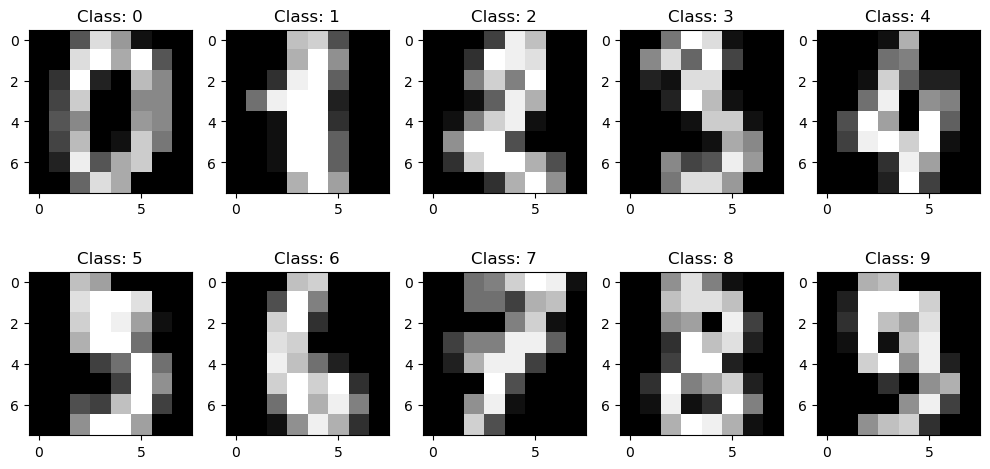

In [16]:
# Create a 5x5 grid of subplots with a defined figure size
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Plot the 10 classes and their corresponding labels in the dataset
for i in range(10):
    row = i // 5  # Determine the row position (0 to 4)
    col = i % 5   # Determine the column position (0 to 4)

    # Display the image using grayscale colormap
    axes[row, col].imshow(ds_digits.images[i], cmap='gray')

    # Set the title for the subplot with the image label
    axes[row, col].set_title(f"Class: {ds_digits.target[i]}")

# Adjust the spacing between subplots for better layout
plt.tight_layout()

# Display the subplots
plt.show()


The images are shown in grayscale, and the title of each subplot indicates the label associated with that image.

### Exercise 3.3: Find the best classifier (of the three we have seen)

You should now be very familiar with this game and if you consolidated the pieces you used before, this exercise should be easy. As always, document, summarize, and justify your conclusions and analyses.

In [17]:
Xtr, Xte, ytr, yte = train_test_split(df_digits, targets_digits, test_size=0.75)

bestClassifier(Xtr, ytr) #Heavy AF!


Best LDA Configuration:
Evaluating Degree 1:
  Shrinkage: None, Score: 0.9199
  Shrinkage: auto, Score: 0.9421
  Shrinkage: 1e-07, Score: 0.9199
  Shrinkage: 0.2, Score: 0.9488
  Shrinkage: 0.3, Score: 0.9533
  Shrinkage: 0.4, Score: 0.9511
  Shrinkage: 0.9, Score: 0.9309
Evaluating Degree 2:
  Shrinkage: None, Score: 0.0913
  Shrinkage: auto, Score: 0.9866
  Shrinkage: 1e-07, Score: 0.9733
  Shrinkage: 0.2, Score: 0.9866
  Shrinkage: 0.3, Score: 0.9866
  Shrinkage: 0.4, Score: 0.9866
  Shrinkage: 0.9, Score: 0.9800

Best LDA Configuration:
Best Degree: 2
Best Shrinkage: 0.2
Best Score: 0.9866

Best QDA Configuration:
Degree 1:
  Reg_param: 0.1, Score: 0.8196
  Reg_param: 0.2, Score: 0.8775
  Reg_param: 0.3, Score: 0.8931
  Reg_param: 0.4, Score: 0.9109
  Reg_param: 0.5, Score: 0.9264
  Reg_param: 0.9, Score: 0.9443

Degree 2:
  Reg_param: 0.1, Score: 0.2985
  Reg_param: 0.2, Score: 0.3274
  Reg_param: 0.3, Score: 0.3586
  Reg_param: 0.4, Score: 0.3630
  Reg_param: 0.5, Score: 0.3941


This run needs some time, about 2 minutes. The cool part is that we can see that the best score is the LDA. This is the main reason why i doubt about this method. Is very strange that the linear model fits the best a harder dataset. An other strange aspect is that the time for compute the secondo degree for the LDA is very long compared to the other classifiers. 

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter ranges for the different classifiers
parameters = [0.0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]

# Define a function for grid search and scoring
def grid_and_score(model, param_name, param_range, Xtr, Xte, ytr, yte):
    # Create a parameter grid to search over
    param_grid = {param_name: param_range}
    
    # Perform grid search with cross-validation
    search = GridSearchCV(model, param_grid, cv=3, verbose=3, n_jobs=-1)
    search.fit(Xtr, ytr)
    
    # Calculate the test score of the best model
    test_score = accuracy_score(yte, search.best_estimator_.predict(Xte))
    
    # Print the results
    print(f'Best parameters: {search.best_params_}')
    print(f'Best cross-validation score: {search.best_score_}')
    print(f'Score on the test set: {test_score}')

# The provided code defines the grid_and_score function for grid search and scoring,

Regarding this section, it's where I spent more time than anywhere else. Initially, I opened the provided material and used the methods seen in the slides, such as LearningCurveDisplay.from_estimator and ValidationCurveDisplay.from_estimator. These methods produced slightly different graphs from the ones I created. The reason was that they often had parameters that I didn't fully understand. However, for QDA and SVC, the validation curves produced graphs closer to what I expected, even though LDA produced an empty graph.

To make things less "mysterious," I decided to represent the plots using standard functions.

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve, learning_curve
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

def plot_curves(model, X, y, param_name=None, param_range=None, is_validation_curve=True, cv=3):
    # Check if this is a validation curve or a learning curve
    if is_validation_curve:
        # Compute training and validation scores for the validation curve
        train_score, val_score = validation_curve(
            model, X, y, param_name=param_name, param_range=param_range, cv=cv
        )
    else:
        # Compute learning curve scores
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5)
        )

    # Create a new figure for plotting
    plt.figure(figsize=(10, 6))
    
    # Determine the title based on the curve type
    title = "Validation Curve" if is_validation_curve else "Learning Curve"
    plt.title(f"{title} for {model.__class__.__name__}")
    
    # Set the labels for the x and y axes
    plt.xlabel("Training Examples" if not is_validation_curve else f"{param_name}")
    plt.ylabel("Accuracy")
    
    if is_validation_curve:
        plt.grid()
        
        # Set the y-axis limits
        plt.ylim(0.0, 1.1)
        
        # Compute mean and standard deviation of training and validation scores
        train_mean = np.mean(train_score, axis=1)
        train_std = np.std(train_score, axis=1)
        val_mean = np.mean(val_score, axis=1)
        val_std = np.std(val_score, axis=1)

        # Adjust the parameter range based on the parameter name
        if param_name == "C":
            param_range = np.logspace(-6, 3, len(param_range))
        else:
            param_range = np.linspace(0.1, 1.0, len(param_range))

        # Plot training and validation scores
        plt.semilogx(param_range, train_mean, label="Training score", color="b", marker="o")
        plt.fill_between(
            param_range,
            train_mean - train_std,
            train_mean + train_std,
            alpha=0.2,
            color="b",
        )

        plt.semilogx(param_range, val_mean, label="Validation score", color="r", marker="o")
        plt.fill_between(
            param_range,
            val_mean - val_std,
            val_mean + val_std,
            alpha=0.2,
            color="r",
        )
    else:
        plt.grid()
        
        # Compute mean and standard deviation of training and test scores
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        # Plot training and test scores over different training sizes
        plt.plot(train_sizes, train_mean, label="Training Score", marker="o", color="b")
        plt.fill_between(
            train_sizes,
            train_mean - train_std,
            train_mean + train_std,
            color="b",
            alpha=0.2,
        )

        plt.plot(train_sizes, test_mean, label="Test Score", marker="o", color="r")
        plt.fill_between(
            train_sizes,
            test_mean - test_std,
            test_mean + test_std,
            color="r",
            alpha=0.2,
        )

    # Add a legend to the plot
    plt.legend(loc="best")
    
    # Show the plot
    plt.show()


Here we just got the complete code for the plot_curves function.

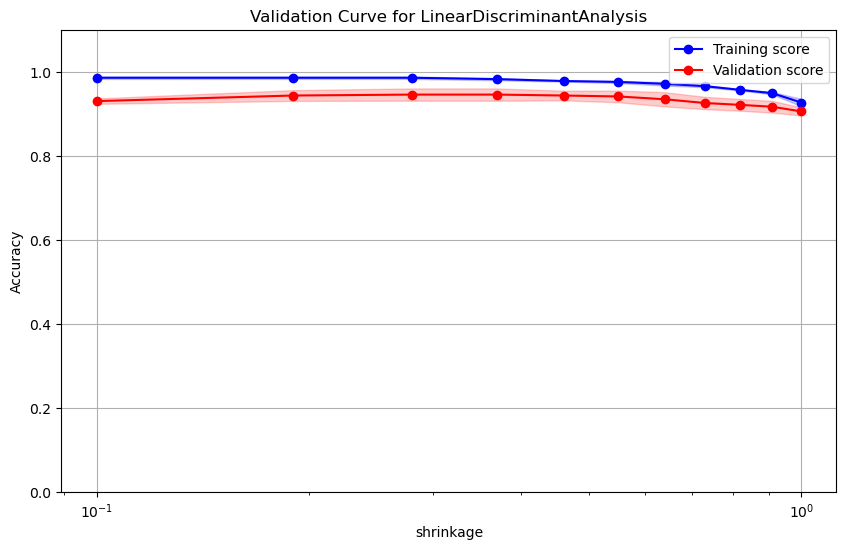

In [20]:
plot_curves(LinearDiscriminantAnalysis(solver = 'lsqr'), Xtr, ytr, param_name="shrinkage", param_range=parameters, is_validation_curve=True)


This is the plot where i don't fully understeand. For different parameter names, the plot is more less the same. Even with different parameter range the plot is more less the same. 

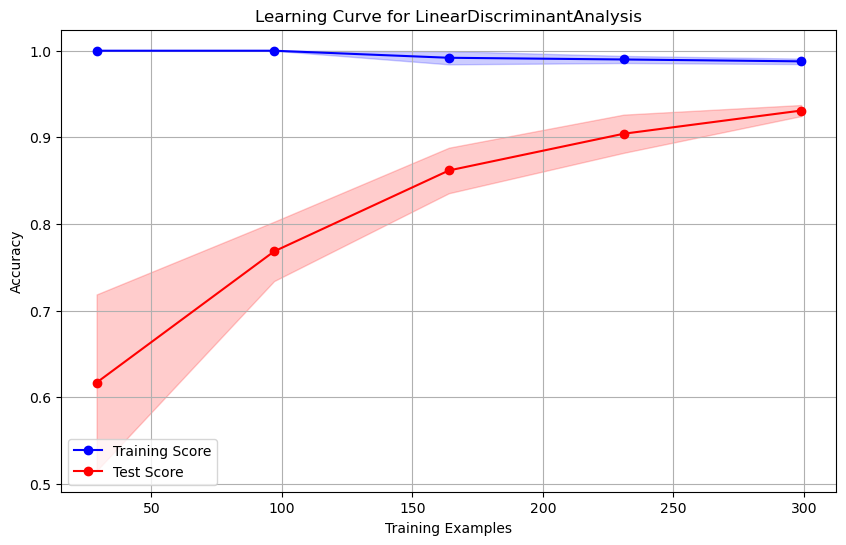

In [21]:

plot_curves(LinearDiscriminantAnalysis(solver = 'lsqr',), Xtr, ytr, param_name="shrinkage", param_range=parameters, is_validation_curve=False)

Here seems that the curve is doing as expected. More training examples = more accuracy

In [22]:
grid_and_score(LinearDiscriminantAnalysis(solver = 'lsqr',), "shrinkage", parameters, Xtr, Xte, ytr, yte)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[CV 1/3] END .....................shrinkage=0.0;, score=0.940 total time=   0.0s
[CV 3/3] END .....................shrinkage=0.2;, score=0.926 total time=   0.0s
[CV 1/3] END .....................shrinkage=0.3;, score=0.953 total time=   0.0s
[CV 2/3] END .....................shrinkage=0.3;, score=0.960 total time=   0.0s
[CV 3/3] END .....................shrinkage=0.3;, score=0.926 total time=   0.0s
[CV 1/3] END .....................shrinkage=0.4;, score=0.940 total time=   0.0s
[CV 3/3] END .....................shrinkage=0.0;, score=0.926 total time=   0.0s
[CV 2/3] END .....................shrinkage=0.4;, score=0.960 total time=   0.0s
[CV 2/3] END .....................shrinkage=0.0;, score=0.927 total time=   0.0s
[CV 1/3] END .....................shrinkage=0.2;, score=0.953 total time=   0.0s
[CV 2/3] END .....................shrinkage=0.1;, score=0.953 total time=   0.0s
[CV 3/3] END .....................shrinkage=0.4;, score=0.933 total time=   0.0s
[CV 1/3] END ...............

Scores are good but not as good as the other models.

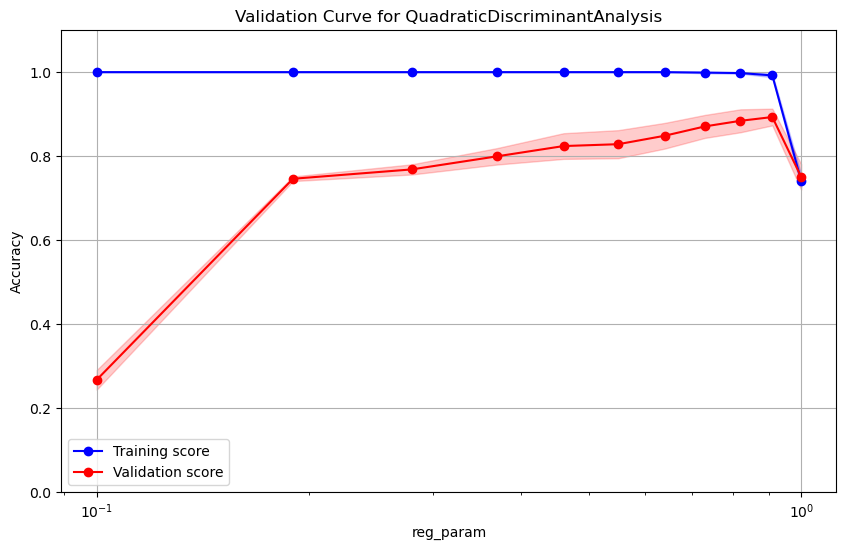

In [23]:
plot_curves(QuadraticDiscriminantAnalysis(), Xtr, ytr, param_name="reg_param", param_range=parameters, is_validation_curve=True)

Here we got a better plot, closer to what i aspected. We can also see that the curve is losing accuracy with more training examples. This happend also with the ValidationCurveDisplay.from_estimator.

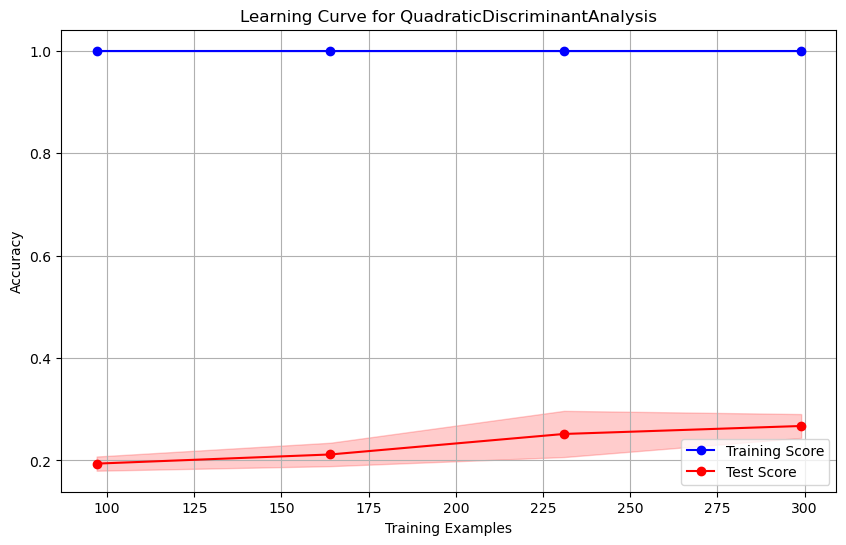

In [24]:
plot_curves(QuadraticDiscriminantAnalysis(), Xtr, ytr, param_name="reg_param", param_range=parameters, is_validation_curve=False)

Well, the curve is not as good as the other models. The test score is very low with this training examples. The model gains accuracy with more examples. I decided to leave these values to better see the difference with other models.

In [25]:
grid_and_score(QuadraticDiscriminantAnalysis(), "reg_param", parameters, Xtr, Xte, ytr, yte)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV 1/3] END .....................reg_param=0.0;, score=0.300 total time=   0.0s
[CV 2/3] END .....................reg_param=0.0;, score=0.253 total time=   0.0s
[CV 3/3] END .....................reg_param=0.0;, score=0.248 total time=   0.0s
[CV 1/3] END .....................reg_param=0.1;, score=0.740 total time=   0.0s
[CV 2/3] END .....................reg_param=0.1;, score=0.753 total time=   0.0s
[CV 3/3] END .....................reg_param=0.1;, score=0.745 total time=   0.0s
[CV 1/3] END .....................reg_param=0.2;, score=0.773 total time=   0.0s
[CV 2/3] END .....................reg_param=0.2;, score=0.780 total time=   0.0s
[CV 3/3] END .....................reg_param=0.3;, score=0.772 total time=   0.0s
[CV 2/3] END .....................reg_param=0.3;, score=0.813 total time=   0.0s
[CV 3/3] END .....................reg_param=0.2;, score=0.752 total time=   0.0s
[CV 1/3] END .....................reg_param=0.3;

/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: 

Super good results! The test score is very good and as expected a quadratic model describes better a dataset like the one we're using.

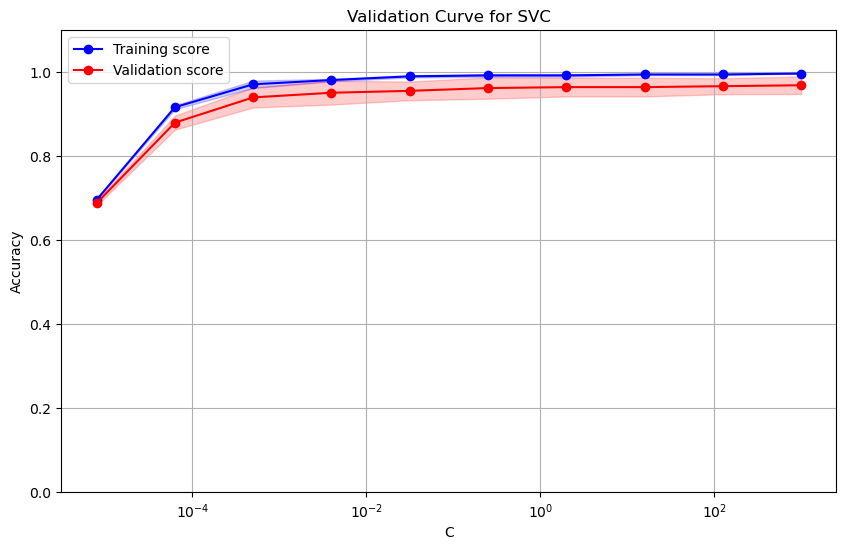

In [26]:
plot_curves(SVC(), Xtr, ytr, param_name="C", param_range=parameters, is_validation_curve=True)


SVC is also a very good model for our case. Close to the quadratic.

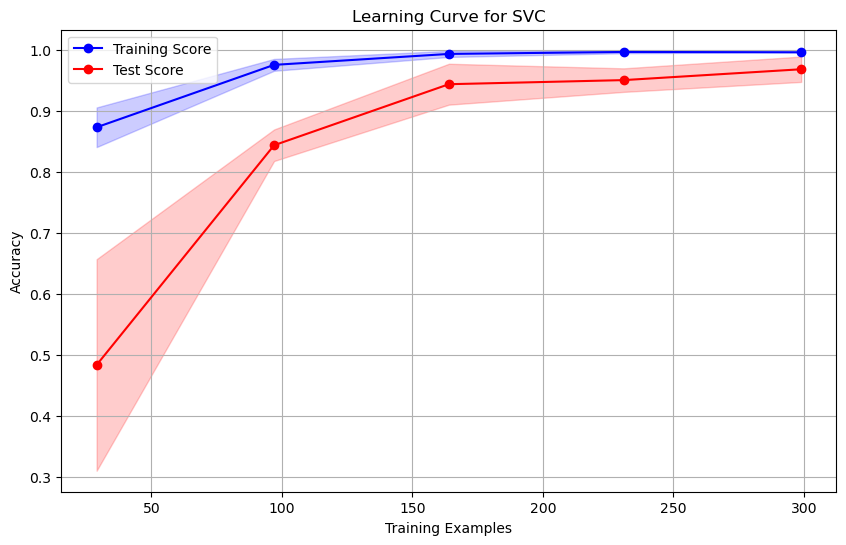

In [27]:
plot_curves(SVC(), Xtr, ytr, param_name="C", param_range=parameters, is_validation_curve=False)


As we can see with not so much training examples the test score has a good accuracy.

In [28]:
grid_and_score(SVC(), "C", parameters, Xtr, Xte, ytr, yte)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV 1/3] END ...............................C=0.0;, score=nan total time=   0.0s
[CV 2/3] END ...............................C=0.0;, score=nan total time=   0.0s
[CV 3/3] END ...............................C=0.0;, score=nan total time=   0.0s
[CV 1/3] END .............................C=0.1;, score=0.680 total time=   0.0s
[CV 2/3] END .............................C=0.1;, score=0.693 total time=   0.0s
[CV 3/3] END .............................C=0.1;, score=0.691 total time=   0.0s
[CV 1/3] END .............................C=0.2;, score=0.880 total time=   0.0s
[CV 2/3] END .............................C=0.2;, score=0.900 total time=   0.0s
[CV 3/3] END .............................C=0.2;, score=0.859 total time=   0.0s
[CV 1/3] END .............................C=0.3;, score=0.960 total time=   0.0s
[CV 1/3] END .............................C=0.4;, score=0.980 total time=   0.0s
[CV 2/3] END .............................C=0.3;

/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 33.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_

**FINAL ANALYSIS**

A validation curve, in the context of machine learning and model evaluation, is a graphical representation of how a model's performance metric (e.g., accuracy, F1-score, mean squared error, etc.) changes as a specific hyperparameter varies. By plotting a validation curve, you can observe how different values of a hyperparameter affect the model's performance and choose the best value.

Two Curves: There are usually two curves on the graph:

Training Curve: This curve shows how the performance metric changes on the training data as the hyperparameter varies. It reflects how well the model fits the training data.

Validation Curve: This curve shows how the performance metric changes on a separate validation dataset (or through cross-validation) as the hyperparameter varies. It reflects how well the model generalizes to unseen data.

A learning curve, in the context of machine learning, is a graphical representation of how a model's performance evolves as it's trained on increasingly larger subsets of a dataset. Learning curves provide insights into how a machine learning algorithm or model learns from data and help in understanding key aspects of model performance, such as bias and variance.

A typical learning curve has two components:

Training Curve: This curve shows how the model's performance (e.g., accuracy) on the training data evolves as the training dataset size increases. Initially, with a small dataset, the model may achieve high training accuracy. However, as more data is added, the training accuracy may decrease or stabilize.

Validation Curve: This curve demonstrates how the model's performance on a separate validation dataset (or through cross-validation) changes with increasing training data. It provides insights into how well the model generalizes to unseen data as more training examples are provided.

The test set score is based on a completely separate dataset that the model has never seen during training or validation.
It provides a final evaluation of the model's performance on real-world, unseen data. 

So according to results, the winner is: depends. QDA has better score but, according to the learning curve, SVC gains a high accuracy way before than QDA.
